In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import matplotlib.style as style

In [2]:
demograph = pd.read_csv("Downloads/dunnhumby_The-Complete-Journey/CSVfiles/hh_demographic.csv")
demograph.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [3]:
#building a pie chart function for categorical data
def piechart(data):
    features = data.columns
    #plot pie charts of categorical variables
    pies = plt.figure(figsize=(15,15))
    count = 1
    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = pies.add_subplot(rows,cols,count)
        data[i].value_counts().plot(kind="pie",autopct="%.1f%%",ax=ax)
        plt.ylabel("")
        plt.title(i,fontweight="bold",fontsize=8)
        count += 1

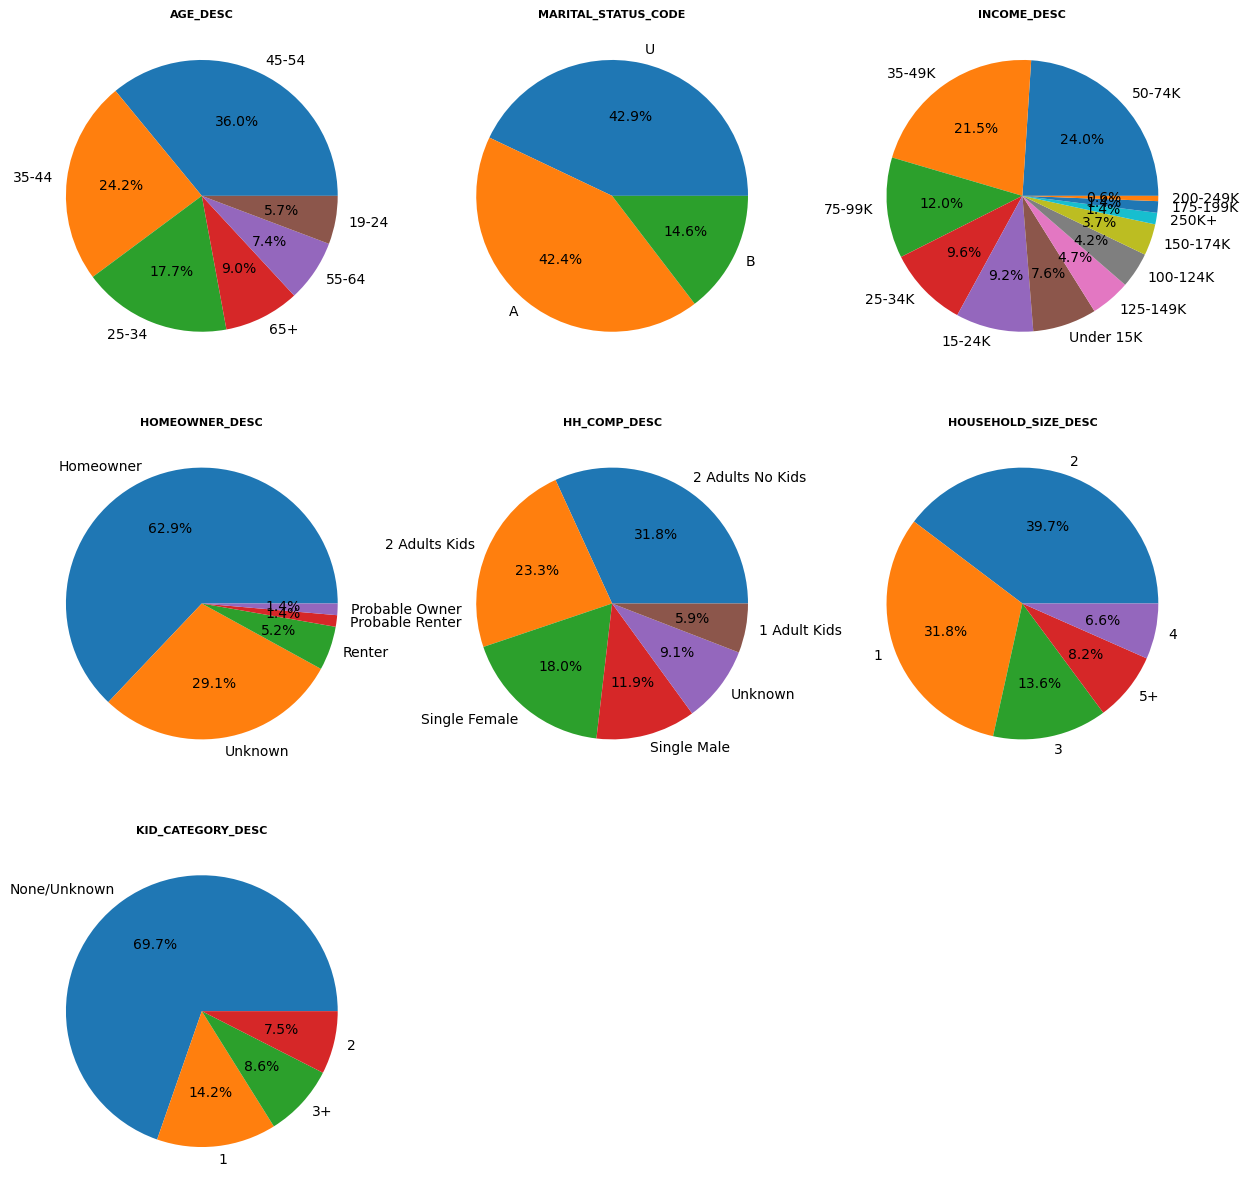

In [4]:
piechart(demograph.drop("household_key", axis = 1))

In [5]:
camp_desc = pd.read_csv("Downloads/dunnhumby_The-Complete-Journey/CSVfiles/campaign_desc.csv")
camp_desc.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


/var/folders/31/5gglsd3x20x1_wzpr_058cz00000gn/T/ipykernel_8522/593714786.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-notebook')


<Axes: xlabel='CAMPAIGN', ylabel='DURATION'>

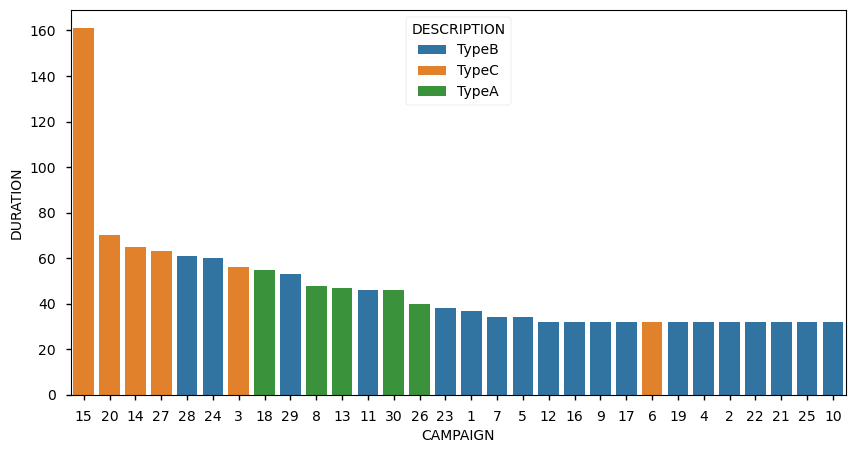

In [6]:
camp_length = pd.DataFrame(camp_desc)
camp_length['DURATION'] = camp_length.apply(lambda row: row.END_DAY - row.START_DAY, axis = 1)
camp_length.head()
fig = plt.figure(figsize=(10,5))
style.use('seaborn-notebook')
sns.barplot(data = camp_length, x="CAMPAIGN", y="DURATION", orient = 'v', hue="DESCRIPTION", order = camp_length.sort_values(by="DURATION",ascending=False).CAMPAIGN.values, dodge = False)

In [7]:
camp_table = pd.read_csv("Downloads/dunnhumby_The-Complete-Journey/CSVfiles/campaign_table.csv")
camp_table.head()

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [8]:
len(camp_table.household_key.unique())

1584

In [9]:
#first plot the number of campaigns a household has recieved 
camps_per_hh = camp_table['household_key'].value_counts()
camps_per_hh = pd.DataFrame(list(zip(camps_per_hh.index, camps_per_hh)), columns = ["household_key", "Campaigns Recieved"])
camps_per_hh

,household_key,Campaigns Recieved
0,2317,17
1,2489,16
2,1527,15
3,718,15
4,2459,15
...,...,...
1579,563,1
1580,566,1
1581,2021,1
1582,2032,1


In [10]:
camps_per_household = camp_table['household_key'].value_counts()
camps = camps_per_household.value_counts()
camps[0] = 2500 - len(camp_table.household_key.unique())
camps = pd.DataFrame(list(zip(camps.index, camps)), columns=["Campaigns Recieved","Households"]).sort_values(by="Campaigns Recieved", ascending = True)
camps

,Campaigns Recieved,Households
17,0,916
0,1,268
1,2,224
2,3,214
4,4,169
3,5,179
5,6,138
6,7,120
7,8,94
8,9,62


<Axes: xlabel='Households', ylabel='Campaigns Recieved'>

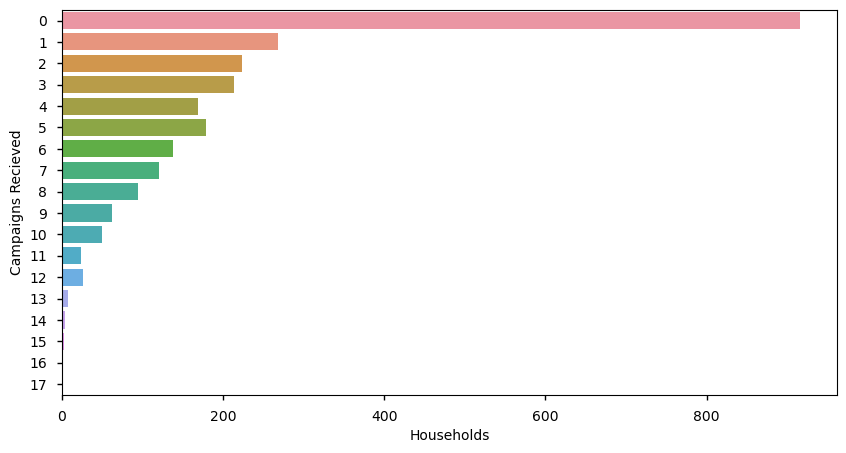

In [11]:
fig = plt.figure(figsize=(10,5))
sns.barplot(data = camps, x = "Households", y = "Campaigns Recieved", orient = "h", order=camps["Campaigns Recieved"])

<Axes: xlabel='Number of Campaigns', ylabel='Campaign'>

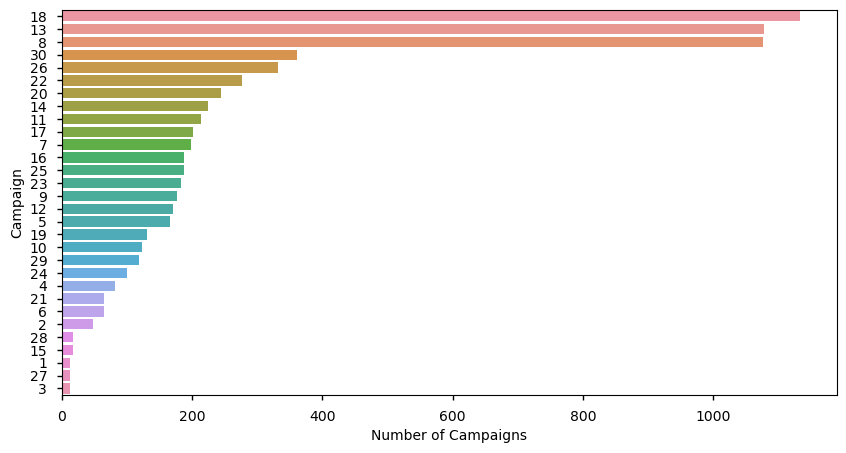

In [12]:
#now to find which campgains are common
uni_camps = pd.DataFrame(list(zip(camp_table['CAMPAIGN'].value_counts().index, camp_table['CAMPAIGN'].value_counts())), columns = ['Campaign', "Number of Campaigns"])

fig = plt.figure(figsize=(10,5))
sns.barplot(data = uni_camps, y = 'Campaign' , x = "Number of Campaigns", orient = "h", order = uni_camps["Campaign"])

In [13]:
coupon = pd.read_csv("Downloads/dunnhumby_The-Complete-Journey/CSVfiles/coupon.csv")
coupon.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [14]:
coupon_redeem = pd.read_csv("Downloads/dunnhumby_The-Complete-Journey/CSVfiles/coupon_redempt.csv")
coupon_redeem.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


<Axes: xlabel='Number of Redeems', ylabel='Campaign'>

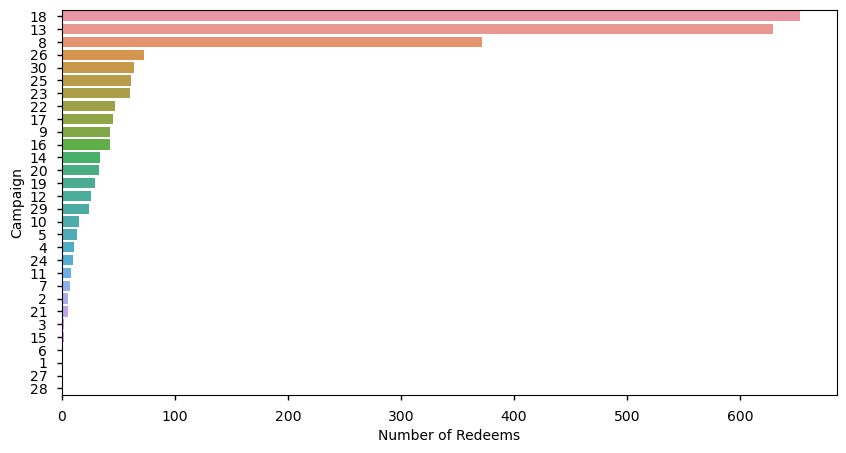

In [15]:
redeems_per_campaign = pd.DataFrame(list(zip(coupon_redeem["CAMPAIGN"].value_counts().index, coupon_redeem["CAMPAIGN"].value_counts())), columns = ["Campaign", "Number of Redeems"])
fig = plt.figure(figsize=(10,5))
sns.barplot(data = redeems_per_campaign, y = 'Campaign' , x = "Number of Redeems", orient = "h", order = redeems_per_campaign["Campaign"])

In [16]:
len(coupon_redeem.household_key.unique())

434

<Axes: xlabel='Redeem Rate', ylabel='Campaign'>

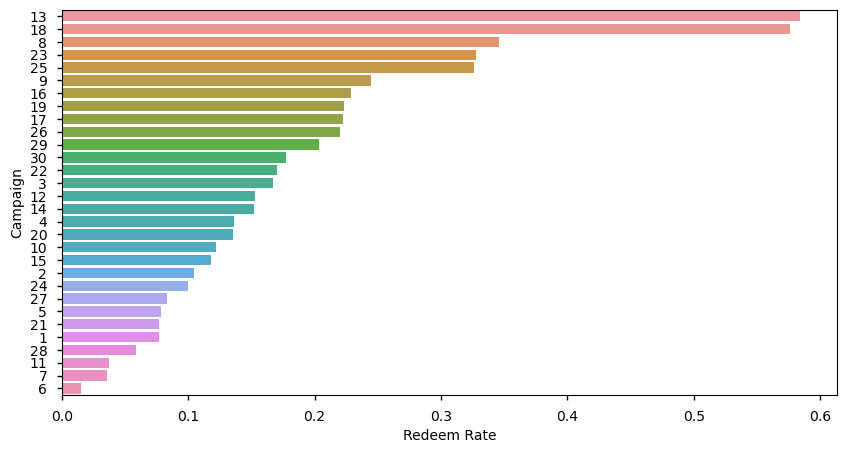

In [17]:
#now to find the redeem rate for each campaign
redeem_rate = coupon_redeem["CAMPAIGN"].value_counts().sort_values()/camp_table["CAMPAIGN"].value_counts().sort_values()
redeem_rate = pd.DataFrame(list(zip(redeem_rate.index, redeem_rate)), columns = ["Campaign", "Redeem Rate"]).sort_values(by="Redeem Rate", ascending = False)
fig = plt.figure(figsize=(10,5))
sns.barplot(data = redeem_rate, y = 'Campaign' , x = "Redeem Rate", orient = "h", order = redeem_rate["Campaign"])

In [18]:
transactions = pd.read_csv("Downloads/dunnhumby_The-Complete-Journey/CSVfiles/transaction_data.csv")
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [19]:
products = pd.read_csv("Downloads/dunnhumby_The-Complete-Journey/CSVfiles/product.csv")
len(products['DEPARTMENT'].unique())

44

<Axes: xlabel='Total Sales', ylabel='Store'>

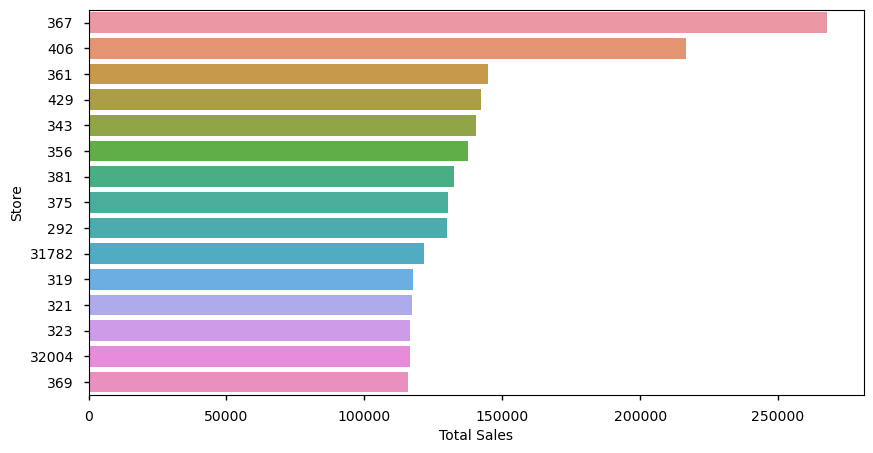

In [20]:
store_sales = transactions.groupby("STORE_ID").sum()["SALES_VALUE"].sort_values(ascending = False)
store_sales = pd.DataFrame(list(zip(store_sales.index, store_sales)), columns = ["Store", "Total Sales"])
fig = plt.figure(figsize=(10,5))
sns.barplot(data = store_sales[:15], y = 'Store' , x = "Total Sales", orient = "h", order = store_sales[:15]["Store"])

In [21]:
#checking to see how to group products
len(products["PRODUCT_ID"].unique())

92353

In [22]:
len(transactions["household_key"].unique())

2500

In [23]:
#data by householod numbers
total = transactions.groupby("household_key")
total_group = total.sum()
total.first()

,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
household_key,,,,,,,,,,,
1,27601281299,51,825123,1,3.99,436,0.00,1456,8,0.0,0.0
2,28210649301,103,854852,1,0.65,401,0.00,1904,15,0.0,0.0
3,28344561779,113,866211,1,3.08,401,-1.04,1549,17,0.0,0.0
4,28243317097,104,836163,2,3.00,298,-2.58,1452,16,0.0,0.0
5,27997276369,85,938983,1,1.99,374,0.00,1540,13,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2496,28391736778,117,840361,1,0.79,370,-0.60,1345,17,0.0,0.0
2497,27913035576,78,838220,1,25.33,339,0.00,1121,12,0.0,0.0
2498,28243481507,105,824555,1,0.10,309,-0.10,1823,16,0.0,0.0


In [24]:
#calculate the average spent by a household
avg_spent = transactions["SALES_VALUE"].sum()/len(total)
round(avg_spent,2)

3222.99

In [25]:
#average products bought by house
avg_prod = (total_group["QUANTITY"].mean())
round(avg_prod,2)

104274.25

In [26]:
#average store visits by house
avg_visits = len(transactions.groupby(["household_key", "DAY"]).count())/len(total)
round(avg_visits,2)

90.21

<Axes: xlabel='Total Purchases', ylabel='Household'>

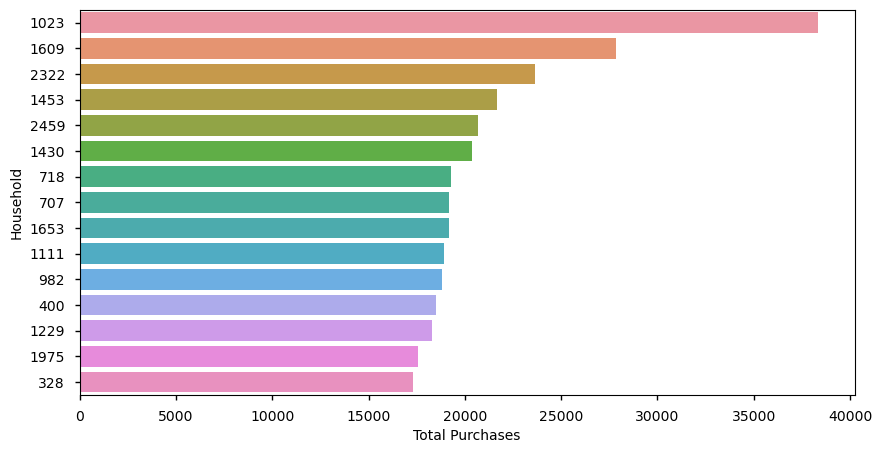

In [27]:
#checking to now see which household purchased the most
house_purch = transactions.groupby("household_key").sum()["SALES_VALUE"].sort_values(ascending = False)
house_purch = pd.DataFrame(list(zip(house_purch.index, house_purch)), columns = ["Household", "Total Purchases"])
fig = plt.figure(figsize=(10,5))
sns.barplot(data = house_purch[:15], y = 'Household' , x = "Total Purchases", orient = "h", order = house_purch[:15]["Household"])


In [28]:
#checking for products bought for coupons
coupon_product = coupon.merge(right = products, on = 'PRODUCT_ID', how = 'left')
coupon_product_group = coupon_product.groupby('DEPARTMENT', as_index = False).agg(distinctProducts = ('PRODUCT_ID', 'count'))
coupon_product_group.sort_values('distinctProducts', ascending = False)                                                                                               

,DEPARTMENT,distinctProducts
11,GROCERY,51507
5,DRUG GM,33780
22,PRODUCE,8276
13,MEAT,7548
14,MEAT-PCKGD,7547
1,COSMETICS,6618
6,FLORAL,2673
17,NUTRITION,2281
27,SEAFOOD-PCKGD,2192
26,SEAFOOD,751


In [29]:
coupon.groupby('CAMPAIGN').agg(nb_coupon = ('COUPON_UPC','nunique'),nb_product = ('PRODUCT_ID','nunique')).sort_values('nb_product', ascending = False).head()

,nb_coupon,nb_product
CAMPAIGN,,
13,207,35616
18,209,35513
8,209,17178
26,181,3396
30,181,3205


In [30]:
basket = transactions.groupby(['BASKET_ID'], as_index = False).agg(SALES_VALUE = ('SALES_VALUE', 'sum'),COUPON_DISC = ('COUPON_DISC', 'sum'),COUPON_MATCH_DISC = ('COUPON_MATCH_DISC', 'sum') )
basket['Coupon Used'] = basket['COUPON_DISC'] != 0
basket.head()

,BASKET_ID,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC,Coupon Used
0,26984851472,5.91,0.0,0.0,False
1,26984851516,12.43,0.0,0.0,False
2,26984896261,11.37,0.0,0.0,False
3,26984905972,2.55,0.0,0.0,False
4,26984945254,3.53,0.0,0.0,False


In [31]:
#every transaction based on product and coupon usage
transaction_bis = transactions.merge(right = basket[['BASKET_ID','Coupon Used']], on = 'BASKET_ID', how = 'left') 
transaction_bis['product_value'] = transaction_bis['SALES_VALUE']/transaction_bis['QUANTITY']
transaction_bis =  transaction_bis.merge(right = products, on = 'PRODUCT_ID', how = 'left') 
transaction_bis.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Coupon Used,product_value,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,False,1.39,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,False,0.82,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,False,0.99,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,False,1.21,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,False,1.50,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB


In [32]:
#which products have been bought with their coupons - common
COMMODITY_coupon = transaction_bis.groupby(['COMMODITY_DESC'], as_index = False).agg(Qt_total= ('QUANTITY', 'count'),Use_coupon = ('Coupon Used', 'sum'), COUPON = ('COUPON_DISC', 'sum'))
COMMODITY_coupon['%_Coupon'] = round(((COMMODITY_coupon['Use_coupon']/COMMODITY_coupon['Qt_total'])*100),2)
COMMODITY_coupon = COMMODITY_coupon.sort_values('COUPON', ascending = True)
COMMODITY_coupon.head(11)

,COMMODITY_DESC,Qt_total,Use_coupon,COUPON,%_Coupon
0,,7839,6198,-10306.04,79.07
273,SOFT DRINKS,117532,13685,-3653.98,11.64
58,CIGARETTES,12319,1060,-1454.67,8.60
85,DIAPERS & DISPOSABLES,5008,1226,-1021.82,24.48
3,AIR CARE,5556,1364,-910.04,24.55
67,COLD CEREAL,37870,6466,-848.28,17.07
243,REFRGRATD DOUGH PRODUCTS,18960,4202,-821.73,22.16
140,FRZN MEAT/MEAT DINNERS,56064,10222,-790.54,18.23
134,FROZEN PIZZA,43362,7394,-783.84,17.05
91,DOG FOODS,12093,2437,-732.33,20.15


In [33]:
#average price of basket
round(basket['SALES_VALUE'].mean(),2)

29.14

Text(0.5, 1.0, 'Basket Range')

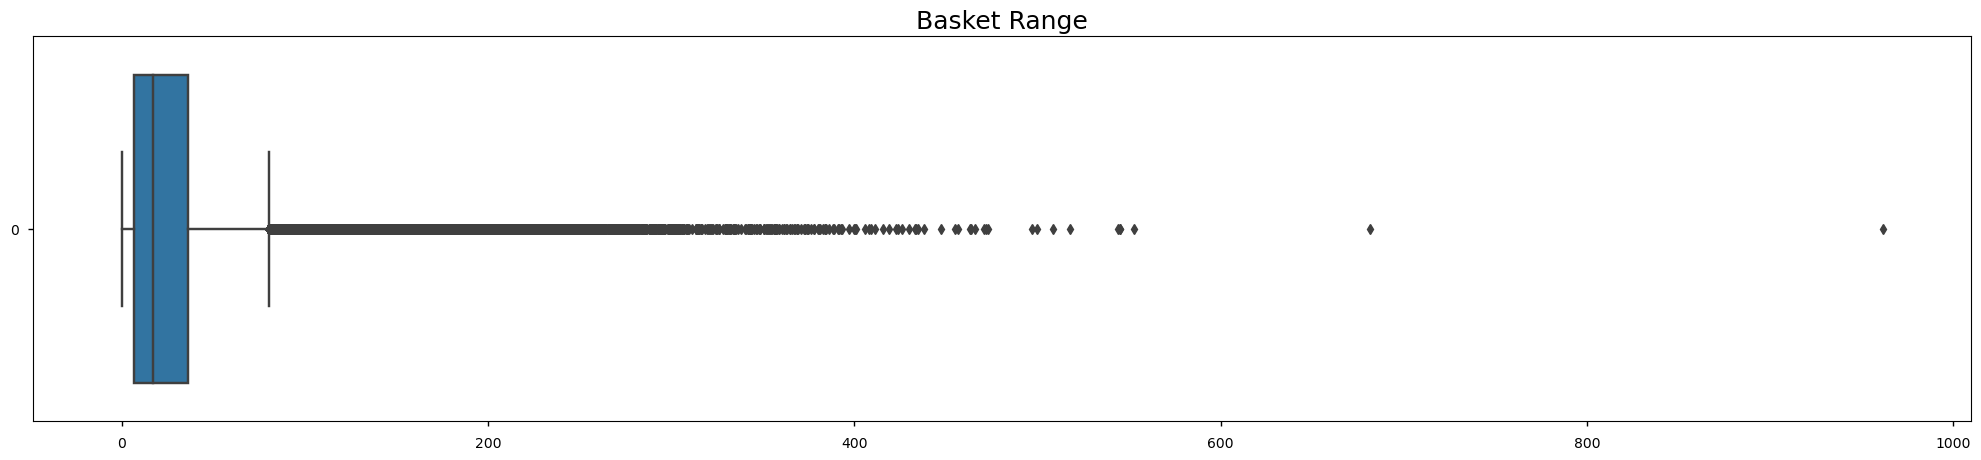

In [34]:
fig = plt.figure(figsize = (25,5))
sns.boxplot( basket['SALES_VALUE'], orient = 'h')
plt.title('Basket Range', fontsize = 18)

In [35]:
#finding avg prices of sales w/wo coupons
coupon_used = basket.groupby(['Coupon Used'], as_index = False).agg(Avg_Sale = ('SALES_VALUE', 'mean')
                                                     ,Avg_Coupon_Disc = ('COUPON_DISC', 'mean')
                                                     ,Avg_Coupon_Match_Disc = ('COUPON_MATCH_DISC', 'mean')
                                                     ,total_baskets = ('SALES_VALUE', 'count'))
coupon_used['%ofbaskets'] = round((coupon_used['total_baskets']/(coupon_used['total_baskets'].sum()))*100,2)
coupon_used

,Coupon Used,Avg_Sale,Avg_Coupon_Disc,Avg_Coupon_Match_Disc,total_baskets,%ofbaskets
0,False,26.664947,0.000000,0.00000,259733,93.94
1,True,67.559937,-2.543821,-0.45226,16751,6.06


In [36]:
#possible trend in price and usage of coupon
basket['splits'] = pd.qcut(basket['SALES_VALUE'],4)
split = basket.groupby(['splits'], as_index = False).agg(Coupons_Used = ('Coupon Used', 'sum'), total_baskets = ('SALES_VALUE', 'count'))
split['%ofcouponused'] = round((split['Coupons_Used']/split['total_baskets'])*100,2)
split

,splits,Coupons_Used,total_baskets,%ofcouponused
0,"(-0.001, 6.96]",792,69170,1.15
1,"(6.96, 17.07]",1971,69097,2.85
2,"(17.07, 36.28]",3297,69111,4.77
3,"(36.28, 961.49]",10691,69106,15.47


In [37]:
#found relationship (higher price, higher prob of coupon used)
#finding relation between where discounts have a prominence
basket_coupon = basket[basket['Coupon Used']==True]
coupon_split = basket_coupon.groupby(['splits'], as_index = False).agg(SALES_VALUE = ('SALES_VALUE', 'mean'), coupon_value = ('COUPON_DISC', 'mean'), Coupons = ('COUPON_DISC', 'count'))
sum_Coupons = coupon_split['Coupons'].sum()
coupon_split['%_disc'] = round(((coupon_split['coupon_value']/coupon_split['SALES_VALUE'])*100),2)
coupon_split['%_Coupons'] = round(((coupon_split['Coupons']/sum_Coupons)*100),2)
coupon_split

,splits,SALES_VALUE,coupon_value,Coupons,%_disc,%_Coupons
0,"(-0.001, 6.96]",4.008624,-1.203737,792,-30.03,4.73
1,"(6.96, 17.07]",12.127220,-1.677900,1971,-13.84,11.77
2,"(17.07, 36.28]",26.400834,-1.930355,3297,-7.31,19.68
3,"(36.28, 961.49]",95.180560,-2.991924,10691,-3.14,63.82


In [38]:
#per week, how often do households come to shop, price ranges and discount prices

household_weekly = transactions.groupby(['household_key','WEEK_NO','DAY'], as_index = False).agg(SALES_VALUE = ('SALES_VALUE', 'sum'),RETAIL_DISC = ('RETAIL_DISC', 'sum'),COUPON_DISC = ('COUPON_DISC', 'sum'),Coupons = ('COUPON_DISC', 'count'))
hh_per_week = household_weekly.groupby(["WEEK_NO"], as_index = False).agg(households = ('household_key', "nunique"), SALES_VALUE = ('SALES_VALUE', 'sum'), RETAIL_DISC = ('RETAIL_DISC', 'sum'), COUPON_DISC = ('COUPON_DISC', 'sum'), Coupons = ('Coupons','sum'))
hh_per_week['SALES_pHH'] = round(hh_per_week['SALES_VALUE']/hh_per_week['households'],2)
hh_per_week['RDISC_pHH'] = -(round(hh_per_week['RETAIL_DISC']/hh_per_week['households'],2))
hh_per_week['CDISC_pHH'] = -(round(hh_per_week['COUPON_DISC']/hh_per_week['households'],2))
hh_per_week.head()

,WEEK_NO,households,SALES_VALUE,RETAIL_DISC,COUPON_DISC,Coupons,SALES_pHH,RDISC_pHH,CDISC_pHH
0,1,88,5211.16,-1037.25,-16.74,1881,59.22,11.79,0.19
1,2,175,10821.35,-2147.61,-21.58,3675,61.84,12.27,0.12
2,3,228,13498.20,-2548.16,-78.62,4803,59.20,11.18,0.34
3,4,270,15965.99,-2883.95,-77.99,5379,59.13,10.68,0.29
4,5,370,20139.82,-3962.06,-83.36,7168,54.43,10.71,0.23


<Axes: xlabel='WEEK_NO', ylabel='households'>

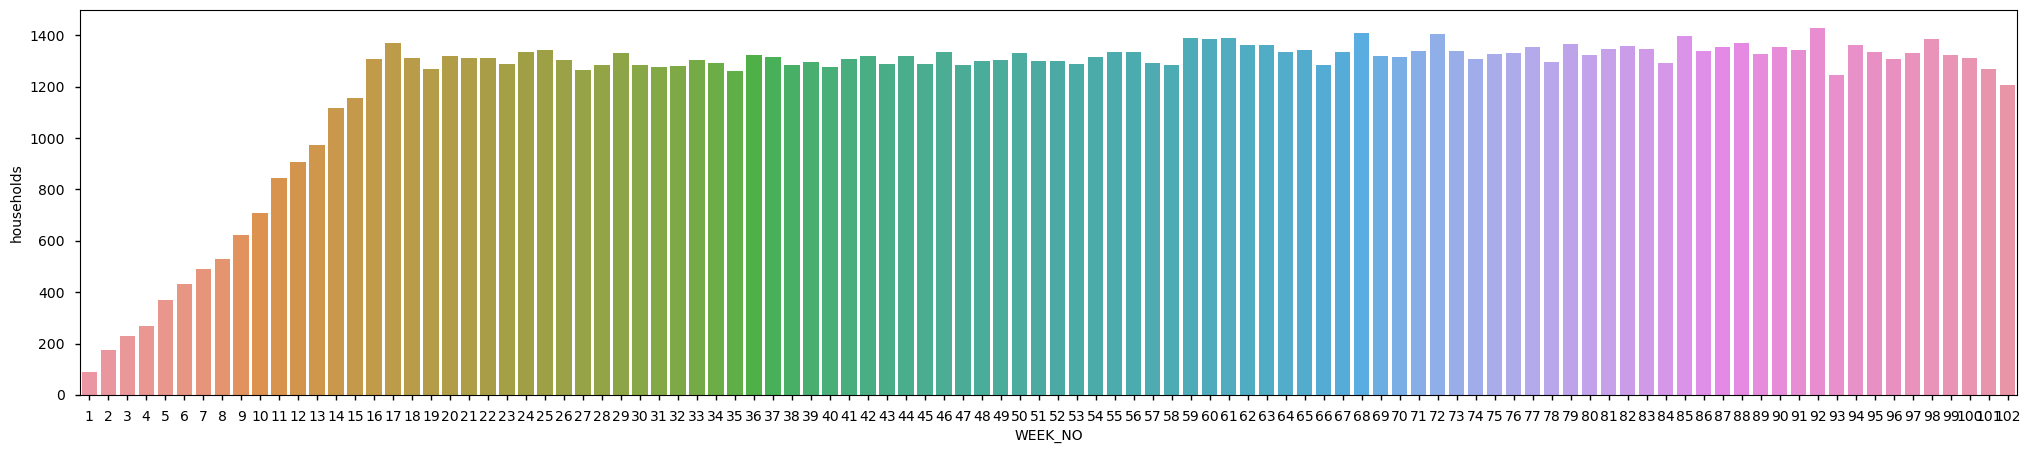

In [39]:
plt.figure(figsize = (25,5))
sns.barplot(x='WEEK_NO', y = 'households', data = hh_per_week)

In [40]:
#frequency of visits household
hhfreq = household_weekly.groupby('household_key').agg(DAY_max = ('DAY','max'),DAY_min = ('DAY','min'),DAY_count = ('DAY','count'))
hhfreq['frequency'] = round((hhfreq['DAY_max'] - hhfreq['DAY_min'])/hhfreq['DAY_count'],1)
print("mean: " +str(hhfreq['frequency'].mean()) +" median: " +str(hhfreq['frequency'].median()))
hhfreq.head()

mean: 15.478440000000003 median: 9.0


,DAY_max,DAY_min,DAY_count,frequency
household_key,,,,
1,706,51,79,8.3
2,668,103,45,12.6
3,703,113,46,12.8
4,627,104,30,17.4
5,703,85,33,18.7


In [41]:
#shopping visits are about 2 weeks, will split by 3 week long time
household_weekly['weekby3'] = household_weekly['WEEK_NO'].apply(lambda x: math.ceil(x/3))
household_3weekly = household_weekly.groupby(['household_key', 'weekby3'], as_index = False).agg(SALES_VALUE = ('SALES_VALUE', 'sum'),RETAIL_DISC = ('RETAIL_DISC', 'sum'), COUPON_DISC = ('COUPON_DISC', 'sum'))
timed_week = household_3weekly.groupby('household_key', as_index = False).agg(timed_week = ('weekby3', 'min'))
household_3weekly = household_3weekly.merge(timed_week, on = 'household_key', how = 'left')
household_3weekly.head()

,household_key,weekby3,SALES_VALUE,RETAIL_DISC,COUPON_DISC,timed_week
0,1,3,78.66,-16.54,-1.00,3
1,1,4,41.10,-8.59,0.00,3
2,1,5,143.78,-34.22,-1.50,3
3,1,6,50.31,-11.21,0.00,3
4,1,7,197.78,-26.82,-2.25,3


In [42]:
#create dataframe to analyse loss and returns of households weekby3
df = pd.DataFrame({'returning': [], 'losing': [], 'reactivation':[], 'new':[]})
i = 1

while i < 35 :
    df_returning = household_3weekly[household_3weekly['weekby3'] == i-1][['household_key', 'timed_week']].merge(household_3weekly[household_3weekly['weekby3']==i][['household_key','timed_week']],on = 'household_key', how = 'inner')
    df_left = household_3weekly[household_3weekly['weekby3'] == i-1][['household_key', 'timed_week']].merge(household_3weekly[household_3weekly['weekby3']==i][['household_key','timed_week']],on = 'household_key', how = 'left')
    df_losing = df_left[df_left['timed_week_y'].isna()]
    df_right = household_3weekly[household_3weekly['weekby3'] == i-1][['household_key', 'timed_week']].merge(household_3weekly[household_3weekly['weekby3']==i][['household_key','timed_week']],on = 'household_key', how = 'right')
    df_new = df_right[df_right['timed_week_x'].isna()]
    df_truly_new = df_new[df_new['timed_week_y']>=i]
    df_reactivated = df_new[df_new['timed_week_y']<i]
    
    df = df.append({'returning':len(df_returning), 'losing': len(df_losing), 'reactivation' : len(df_reactivated), 'new': len(df_truly_new)}, ignore_index = True)
    i += 1
   
df['loss'] = -df['losing']
df['new_hh'] = df['returning']+df['reactivation']+df['new']
df['reactivated_hh'] = df['returning']+df['reactivation']
df = df[['new_hh','reactivated_hh','returning','loss']]

/var/folders/31/5gglsd3x20x1_wzpr_058cz00000gn/T/ipykernel_8522/3238315647.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'returning':len(df_returning), 'losing': len(df_losing), 'reactivation' : len(df_reactivated), 'new': len(df_truly_new)}, ignore_index = True)
/var/folders/31/5gglsd3x20x1_wzpr_058cz00000gn/T/ipykernel_8522/3238315647.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'returning':len(df_returning), 'losing': len(df_losing), 'reactivation' : len(df_reactivated), 'new': len(df_truly_new)}, ignore_index = True)
/var/folders/31/5gglsd3x20x1_wzpr_058cz00000gn/T/ipykernel_8522/3238315647.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'returning':len

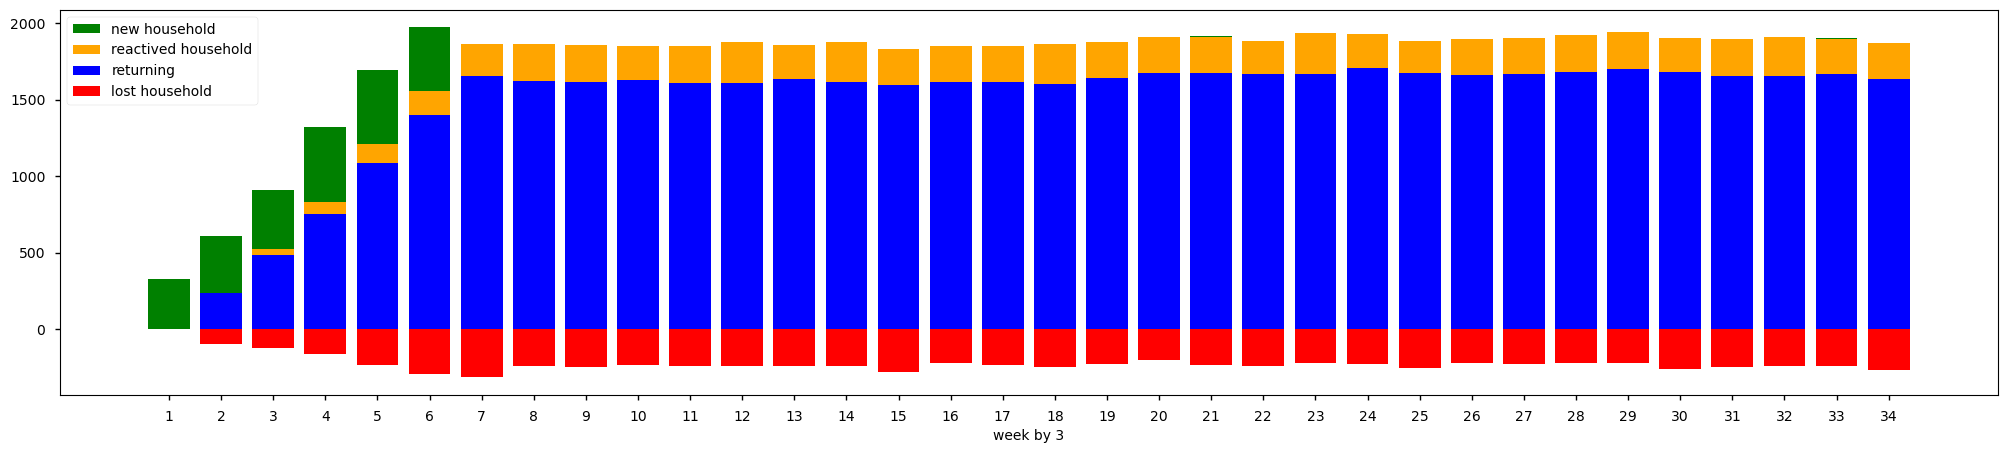

In [43]:
plt.figure(figsize = (25,5))
plt.xticks(np.arange(1, 35, step=1))
plt.bar(range(1,35,1), df['new_hh'], color = 'green',label = "new household")
plt.bar(range(1,35,1), df['reactivated_hh'] ,color = 'orange',label = 'reactived household')
plt.bar(range(1,35,1), df['returning'],color = 'blue',label = 'returning')
plt.bar(range(1,35,1), df['loss'],color = 'red',label = 'lost household')
plt.xlabel("week by 3")
plt.ylabel("")
plt.legend();

In [44]:
demograph.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [45]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [46]:
hh_day = transactions.groupby(['household_key', 'DAY'],as_index = False).agg(SALES_VALUE = ('SALES_VALUE', 'sum'),RETAIL_DISC = ('RETAIL_DISC', 'sum'),COUPON_DISC = ('COUPON_DISC', 'sum'),DAY_MAX = ('DAY','max'),DAY_MIN = ('DAY','min'))
hh_day.head()

,household_key,DAY,SALES_VALUE,RETAIL_DISC,COUPON_DISC,DAY_MAX,DAY_MIN
0,1,51,78.66,-16.54,-1.0,51,51
1,1,67,41.10,-8.59,0.0,67,67
2,1,88,26.90,-6.72,0.0,88,88
3,1,94,63.43,-11.08,-1.5,94,94
4,1,101,53.45,-16.42,0.0,101,101


In [47]:
#household groupby
hh_table = hh_day.groupby('household_key', as_index = False).agg(SALES_VALUE = ('SALES_VALUE', 'sum'), RETAIL_DISC = ('RETAIL_DISC', 'sum'), COUPON_DISC = ('COUPON_DISC', 'sum'),DAY_nb = ('DAY', 'count'), DAY_MAX = ('DAY','max'),DAY_MIN = ('DAY','min'))
hh_table['SALES_VALUE_pd'] = round(hh_table['SALES_VALUE']/hh_table['DAY_nb'],2)
hh_table['RETAIL_DISC_pd'] = round(hh_table['RETAIL_DISC']/hh_table['DAY_nb'],2)
hh_table['COUPON_DISC_pd'] = round(hh_table['COUPON_DISC']/hh_table['DAY_nb'],2)
hh_table['frequency'] = round(((hh_table['DAY_MAX']-hh_table['DAY_MIN'])/hh_table['DAY_nb']),1)
hh_table['Use_coupon'] = hh_table['COUPON_DISC'] != 0
coupon_count = transactions[transactions['COUPON_DISC'] != 0]
hh_coupon = coupon_count.groupby('household_key', as_index = False).agg(nb_coupon = ('COUPON_DISC','count'))

hh_table = hh_table.merge(hh_coupon, on = "household_key", how="left")
hh_table = hh_table[['household_key', 'DAY_nb', 'frequency','SALES_VALUE_pd', 'RETAIL_DISC_pd', 'nb_coupon', 'COUPON_DISC_pd','Use_coupon']]
hh_table


,household_key,DAY_nb,frequency,SALES_VALUE_pd,RETAIL_DISC_pd,nb_coupon,COUPON_DISC_pd,Use_coupon
0,1,79,8.3,54.81,-8.82,106.0,-1.02,True
1,2,45,12.6,43.43,-7.44,6.0,-0.20,True
2,3,46,12.8,57.68,-14.68,53.0,-1.33,True
3,4,30,17.4,40.00,-3.86,1.0,-0.08,True
4,5,33,18.7,23.61,-3.59,NaN,0.00,False
...,...,...,...,...,...,...,...,...
2495,2496,49,11.6,88.56,-22.76,53.0,-1.05,True
2496,2497,193,3.2,36.85,-6.95,12.0,-0.09,True
2497,2498,150,4.0,17.34,-1.86,NaN,0.00,False
2498,2499,81,7.9,41.90,-6.15,4.0,-0.04,True


In [48]:
hh_table['nb_coupon'] = hh_table['nb_coupon'].fillna(0)

hh_demo_table = demograph.merge(hh_table, on = 'household_key', how = 'left')
hh_demo_table

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,DAY_nb,frequency,SALES_VALUE_pd,RETAIL_DISC_pd,nb_coupon,COUPON_DISC_pd,Use_coupon
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,79,8.3,54.81,-8.82,106.0,-1.02,True
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,59,11.6,57.63,-8.18,27.0,-0.52,True
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8,103,6.2,53.74,-10.47,24.0,-0.28,True
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13,203,3.0,64.98,-8.02,300.0,-1.52,True
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16,90,6.6,16.80,-1.90,1.0,-0.01,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2494,31,19.0,68.42,-14.26,8.0,-0.63,True
797,45-54,A,75-99K,Homeowner,Unknown,3,1,2496,49,11.6,88.56,-22.76,53.0,-1.05,True
798,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,2497,193,3.2,36.85,-6.95,12.0,-0.09,True
799,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2498,150,4.0,17.34,-1.86,0.0,0.00,False


In [49]:
camp_table

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26
...,...,...,...
7203,TypeC,1803,15
7204,TypeC,1082,15
7205,TypeC,942,15
7206,TypeC,855,15


In [50]:
camp_phh = camp_table.groupby(['household_key'], as_index = False).agg(DESCRIPTION_mc = ('DESCRIPTION',pd.Series.mode), CAMPAIGN_freq = ('CAMPAIGN', 'count'))
campers = camp_table.groupby('household_key')['CAMPAIGN'].apply(lambda x: x.value_counts().index[0]).reset_index()
camp_phh = camp_phh.merge(campers, on = 'household_key', how = 'left')
camp_phh.head()

,household_key,DESCRIPTION_mc,CAMPAIGN_freq,CAMPAIGN
0,1,TypeB,8,8
1,2,TypeA,1,18
2,3,TypeA,3,8
3,4,TypeA,1,8
4,6,TypeA,4,8


In [ ]:
master_data = hh_demo_table.merge(camp_phh, on = 'household_key', how = 'left')
master_data.info()

In [52]:
coupon.groupby('CAMPAIGN').agg(nb_coupon = ('COUPON_UPC','nunique'),nb_product = ('PRODUCT_ID','nunique')).sort_values('nb_product', ascending = False).head()

,nb_coupon,nb_product
CAMPAIGN,,
13,207,35616
18,209,35513
8,209,17178
26,181,3396
30,181,3205


In [53]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [54]:
demo_trans = transactions.merge(demograph, on = "household_key", how = "left")
demo_trans.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
demograph.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [56]:
coupon.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [57]:
coupon_redeem.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [58]:
demo_trans_coup= demo_trans.merge(coupon_redeem, on = "household_key", how = "right")
demo_trans_coup.head()

,household_key,BASKET_ID,DAY_x,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,DAY_y,COUPON_UPC,CAMPAIGN
0,1,27601281299,51,825123,1,3.99,436,0.00,1456,8,...,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,421,10000085364,8
1,1,27601281299,51,831447,1,2.99,436,0.00,1456,8,...,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,421,10000085364,8
2,1,27601281299,51,840361,1,1.09,436,-0.30,1456,8,...,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,421,10000085364,8
3,1,27601281299,51,845307,1,3.71,436,-0.62,1456,8,...,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,421,10000085364,8
4,1,27601281299,51,852014,1,2.79,436,-1.20,1456,8,...,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,421,10000085364,8


AttributeError: 'DataFrame' object has no attribute 'grou'

In [ ]:
demo_trans_coup_camp = demo_trans_coup.merge(camp_table, on = "household_key", how = "left")
demo_trans_coup_camp.head()

In [ ]:
demo_trans_coup_camp_prod = demo_trans_coup_camp.merge(products, on = "PRODUCT_ID", how = 'left')
demo_trans_coup_camp_prod.head()

In [ ]:
#demo_trans_copoun_camp_prod = demo_trans_coup_camp.merge(coupon, on = "COUPON_UPC", how = 'left')#keeps restarting